# LEAD SCORING CASE STUDY

This case study aims to give an idea of applying logistic regression in a real business scenario to predict which customer is most likely to convert.

## BUSINESS UNDERSTANDING

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

###  PROBLEM STATEMENT

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

We need to help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## DATA UNDERSTANDING

We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. We can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. 

Another thing that we also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).


### GOAL

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. 
- These problems are provided in a separate doc file. We need to fill it based on the logistic regression model we got in the first step. 
- Also, we need to include this in recommendations.

### ASSUMPTIONS

In this case study we have taken below assumptions

- Drop columns with more than 3000 data missing
- Drop columns with more than 50% data as ‘Select’
- Train-Test split will be in 70-30 ratio
- P value < 0.05  and VIF < 5 to be considered while model building
- Geographical data are not important since it is an online education website
- The initial threshold was taken at 0.5 before calculating the optimal cut-off
- We have considered the top 15 feature selection through RFE


## 1. Data Reading and Inspection

#### Data Import 

- In this step we will import the necessary libraries and the data set and perform some preliminary check on data.

In [1]:
# Import numpy and pandas libraries

import numpy as np
import pandas as pd



# Import libraries for plotting graphs and charts

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# import libraries for train-test split and scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# import libraries for model building, feature selection and VIF calculation

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import metrics from sklearn for evaluation

from sklearn import metrics


# Supressing warning

import warnings
warnings.filterwarnings('ignore')


# Setting maximum rows and columns display size to 200 for better visibility of data 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)




In [2]:
#Importing dataset

leads = pd.read_csv('Leads.csv')

In [3]:
# Exploring the first 5 rows

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape

leads.shape

(9240, 37)

- So, we have in total 9240 rows and 37 columns.

In [5]:
# Checking the columns

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Checking column info

leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- This data set has 7 numerical(float/int) and 30 categorical columns. We will check these columns again in data exploration step.

In [7]:
# Checking numerical column summary

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Clean-up and Correction

#### Finding duplicate data

- We dont need unique identifiers for our analysis here, as they will add no value to our objective for this problem. Hence, we can find such columns and drop them.

In [8]:
# Checking for duplicates

for col in leads.columns:
    dup = leads.duplicated(subset=col).sum()
    if dup == 0:
        print(col+' - '+str(dup))

Prospect ID - 0
Lead Number - 0


- No duplicates found for Prospect ID and Lead Number.
- Since these are unique identifiers/numbers, they do not impact our analysis here and we can drop these 2 columns.

In [9]:
# Drop 'Prospect ID','Lead Number' columns

leads.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

- Now. let's check for the missing value in our dataset for each column.

In [10]:
# Checking for null values

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

- There are missing values present in the data set and we need to handle them before moving ahead

- As we can see there are few columns with very number of missing data, we can drop them because if we treat them, that will make our data heavily biased. We can assume it is safe to drop columns with more that 3000 missing data rows.

#### Missing Value Treatment

In [11]:
# Extract the column names with more than 3000 data missing 

missing = list(filter(lambda x: x[1] > 3000 , leads.isnull().sum().iteritems()))

# Extract the column names from the above list

cols_to_drop = [i[0] for i in missing]
cols_to_drop

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
# Remove the columns with more than 3000 missing values

leads.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape 

leads.shape

(9240, 29)

In [13]:
# Check null value count

leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Search                                              0
A free copy of Mastering The Interview              0
Magazine                    

- For the remaining ones, let's explore them one by one and take necessary action for the missing value treatment.

In [14]:
# Check the value count for 'Lead Profile'

leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

- If we see, out of 9240 rows, 4146 rows have the value 'Select'. That means almost 50% of data does not have an accurate information. We can not perform any prediction when we have half of the information unavailable. So, we can go ahead and drop this column.

In [15]:
# Drop the column

leads.drop('Lead Profile', axis = 1, inplace = True)

- The column 'What matters most to you in choosing a course' has 2709 missing values. Let's see how we can handle them.

In [16]:
# Check the value count for 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Here we see almost 99% data has the same value. So, we can drop this column since it is not going to have any impact on our analysis.

In [17]:
# Drop the column

leads.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

- The next column is 'What is your current occupation'.

In [18]:
# Check the value count

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Here we can drop the rows having missing values since this column seems to be an important predictor.

In [19]:
# Drop the rows with null values

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [20]:
# Check the shape

leads.shape

(6550, 27)

In [21]:
# Check null value count

leads.isnull().sum().sort_values(ascending=False)

Country                                     1605
TotalVisits                                  130
Page Views Per Visit                         130
Last Activity                                103
Lead Source                                   36
How did you hear about X Education            19
Specialization                                18
Last Notable Activity                          0
What is your current occupation                0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
Total Time Spent on Website                    0
Search                                         0
A free copy of Mastering The Interview         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

- Since X Education sells online courses, country or city of the lead does not make any difference. Hence, these columns can be dropped as in this case the geographical location of the lead does not matter.

In [22]:
# Dropping City and Country columns

leads.drop(['City','Country'], axis = 1, inplace = True)

- Now the next column is How did you hear about X Education.

In [23]:
# Check the value count

leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

- Here also, out of 9240 rows, 5043 rows have the value 'Select'. That means almost 50% of data does not have an accurate information. We can not perform any prediction when we have half of the information unavailable. So, we can go ahead and drop this column.

In [24]:
# Drop the column

leads.drop('How did you hear about X Education', axis = 1, inplace = True)

- Now, coming to the Specialization column, let's check the value count of this column.

In [25]:
# Checking the column Specialization

leads['Specialization'].value_counts()

Select                               1929
Finance Management                    762
Marketing Management                  678
Human Resource Management             676
Operations Management                 395
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 125
Hospitality Management                 93
E-COMMERCE                             81
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

- Here we can drop the rows with the missing values as this column seems to be important.

In [26]:
# Drop rows with null values 

leads = leads[~pd.isnull(leads['Specialization'])]

- Now, we can check the numerical columns 'Page Views Per Visit','TotalVisits' to treat the missing values.

In [27]:
# Describe the columns

leads[['Page Views Per Visit','TotalVisits']].describe()

,Page Views Per Visit,TotalVisits
count,6402.000000,6402.000000
mean,2.469541,3.608091
std,2.168644,5.042821
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.500000,5.000000
max,55.000000,251.000000


- Here as well we can drop the missing value rows as these columns see important for our prediction.

In [28]:
# Drop rows with null values 

leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]


- The last categorical columns with missing values are Lead Source and Last Activity, with very few missing values respectively. So, we can drop those rows.

In [29]:
# Check value count for 'Last Activity'

leads['Last Activity'].value_counts()

Email Opened                    2460
SMS Sent                        2211
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounced                    175
Form Submitted on Website         81
Unreachable                       71
Unsubscribed                      42
Had a Phone Conversation          23
Approached upfront                 5
View in browser link Clicked       4
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [30]:
# Check value count for 'Lead Source'

leads['Lead Source'].value_counts()

Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
testone                 1
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
Name: Lead Source, dtype: int64

In [31]:
# Drop rows with null values 

leads = leads[~pd.isnull(leads['Last Activity'])]
leads = leads[~pd.isnull(leads['Lead Source'])]

- Now, let's check the missing values once agian.

In [32]:
# Checking for null values

leads.isnull().sum().sort_values(ascending=False)

Last Notable Activity                       0
A free copy of Mastering The Interview      0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [33]:
# Check the shape

leads.shape

(6373, 24)

- The data looks good. We have handled the missing values present in our data set. Now, let's explore the other categorical columns and check how relevant they are in our current analysis. Based on this analysis we can decide whether or not to include these columns in our final model.

- If we check the data dictionary, there are few columns with Yes and No values. Let's check those columns for balance.

In [34]:
binary_columns = ['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 
                'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Newspaper' ,
               'X Education Forums', 'Newspaper Article', 'Magazine', 'Search', 'Do Not Call', 'Do Not Email']

for col in binary_columns:
    print(leads[col].value_counts(normalize=True)*100)
    print('-------------------------------------')

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
-------------------------------------
No    100.0
Name: Get updates on DM Content, dtype: float64
-------------------------------------
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
-------------------------------------
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
-------------------------------------
No     99.905853
Yes     0.094147
Name: Through Recommendations, dtype: float64
-------------------------------------
No     99.952926
Yes     0.047074
Name: Digital Advertisement, dtype: float64
-------------------------------------
No     99.984309
Yes     0.015691
Name: Newspaper, dtype: float64
-------------------------------------
No    100.0
Name: X Education Forums, dtype: float64
-------------------------------------
No     99.984309
Yes     0.015691
Name: Newspaper Article, dtype: float64
-------------------------------------
No    100.0
Name: Magazine, dty

- As we can see, all the columns except 'Do Not Email' are very highly imbalanced. So, we can drop these columns, as they cannot bring in any insight to our analysis for the problem at hand.

In [35]:
# Dropping these columns

binary_columns = ['I agree to pay the amount through cheque','Get updates on DM Content',
                  'Update me on Supply Chain Content','Receive More Updates About Our Courses',
                  'Magazine', 'Newspaper','X Education Forums', 'Do Not Call', 'Search', 
                  'Newspaper Article', 'Through Recommendations','Digital Advertisement']

leads.drop(binary_columns, axis=1, inplace=True)

In [36]:
# Check the shape

leads.shape

(6373, 12)

- Now we are left with just 12 columns. Let's just recollect the column names that we have.

In [37]:
# Check the head

leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened


#### Imbalance Percentage

- Before moving further, let's check how balanced or imbalanced our dataset is. Otherwise it would not make any sense to go ahead and perform analysis and predictions with a data set that is not reliable.

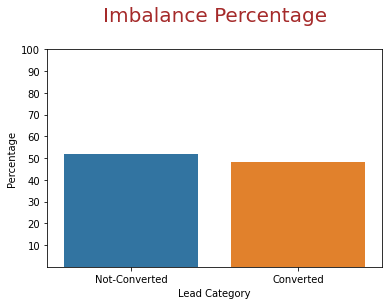

In [38]:
# Plotting imbalance percentage

#Extracting the imbalance percentage
Converted = leads['Converted'].value_counts(normalize=True)*100

# Defining the x values
x= ['Not-Converted','Converted']

# Defining the y ticks
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

# Plotting barplot
sns.barplot(x, Converted)

# Adding plot title, and x & y labels
plt.title('Imbalance Percentage\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Lead Category")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()

- We can see that close to 48% leads have got converted. So, our data set is neither perfectly balanced, which is understandable, nor it is heavily imbalanced to make the dataset unreliable. We, have a good Imbalance Percentage and we are good to go ahead.

## 2. EDA

#### Categorical variable analysis

- Let's plot some graph to see any pattern in data

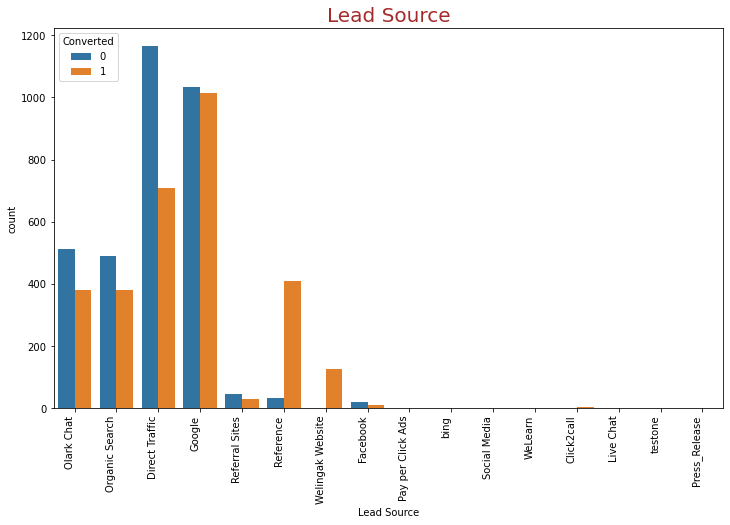

In [39]:
# Plot 'Lead Source'

plt.figure(figsize = [12,7])
sns.countplot(leads['Lead Source'], hue=leads.Converted)
plt.title('Lead Source', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=90,ha='right')
plt.show()

- Leads from sources such as Google, Direct Traffic have maximum number of conversions. 
- However, all most all References have got converted.

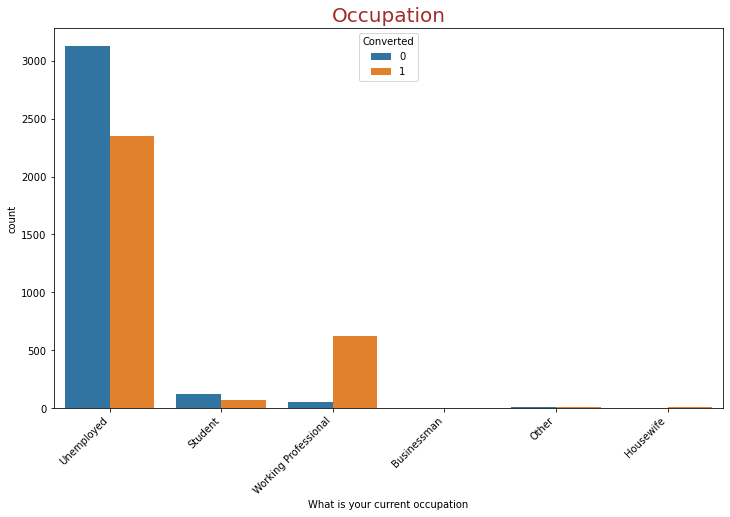

In [40]:
# Plot 'What is your current occupation'

plt.figure(figsize = [12,7])
sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
plt.title('Occupation', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation = 45, ha='right')
plt.show()

- Maximum number of conversions are either Unemployed or Working Professionals.

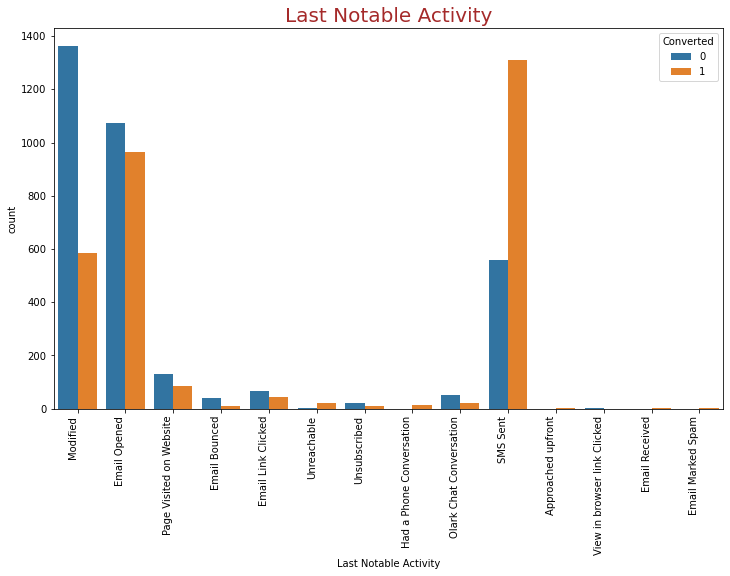

In [41]:
# Plot 'Last Notable Activity'

plt.figure(figsize = [12,7])
sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
plt.title('Last Notable Activity', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=90,ha='right')
plt.show()

- Leads who have had either opened the email or to whom SMS was sent, have high conversion numbers.

#### Numerical Variable Analysis

- Plot the numerical columns to see if any outlier exists.

Text(0.5, 0, 'Page Views Per Visit')

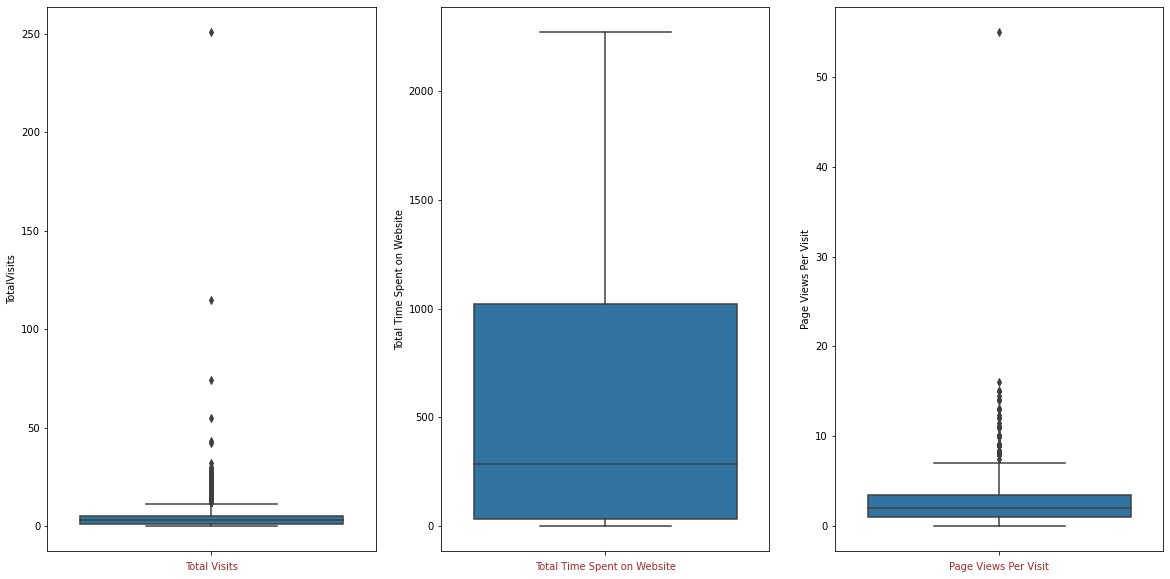

In [42]:
# Use boxplot to plot numerical columns

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.xlabel('Total Visits', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.xlabel('Total Time Spent on Website', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.xlabel('Page Views Per Visit', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})


- Though there are some high value data points exist in case of 'Total Visits' and 'Page Views Per Visit', they are not exceptional and cannot be considered as outliers.
- 'Total Time Spent on Website' does not have any outlier.

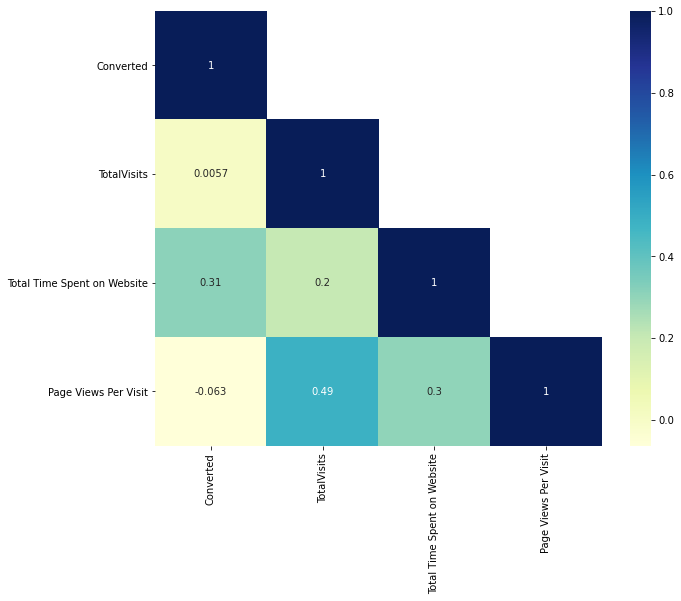

In [43]:
# Let's see the correlation matrix for numerical columns

leads_corr = leads.corr()
plt.figure(figsize=(10,8))
mask = np.array(leads_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(leads_corr, mask = mask,annot=True, cmap='YlGnBu')
plt.show()

- Page Views Per Visit is correlated to Total Visits and Total Time Spent on Website.

## 4. Data Preparation

- Before moving to the next step, let's check the final set of columns we have.

In [44]:
#Final set of variables

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Dummy Variable Creation

In [45]:
# Converting binary variables into numerical

binary_columns = ['Do Not Email','A free copy of Mastering The Interview']

for col in binary_columns:
    
    leads[[col]] = leads[[col]].apply(lambda x: x.map({'Yes':1, 'No':0}))
    leads[col] = leads[col].astype('int')

In [46]:
leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened


In [47]:
# Creating dummy variables for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity',
                               'What is your current occupation','Last Notable Activity']], drop_first = True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
# Adding the results to the master dataframe

leads = pd.concat([leads, dummy1], axis=1)

In [49]:
# Create dummy variables for Specialization

dummy2 = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy2.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
# Dropping Specialization_Select tag column

dummy2 = dummy2.drop(['Specialization_Select'], 1)

# Adding the results to the master dataframe

leads = pd.concat([leads,dummy2], axis=1)

In [51]:
# We have created dummies for the below variables, so we can drop them

leads = leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity',
                    'Specialization'], 1)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Check the columns

leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'La

In [53]:
# Check the shape

leads.shape

(6373, 75)

#### Train Test Split

- Now, we can go ahead and split our data set into train and test. 
- As per our assumption we will use 70-30 ratio for this splitting.

In [54]:
# Split the data into train and test in 70-30 ratio

np.random.seed(0)

df_train, df_test = train_test_split(leads, train_size = 0.70, test_size = 0.30, random_state = 100 )

In [55]:
# Check the train set shape

df_train.shape

(4461, 75)

In [56]:
# Check the train set shape

df_test.shape

(1912, 75)

In [57]:
# Separate X and y on training data

X_train = df_train.drop('Converted', axis = 1)
y_train = df_train['Converted']

In [58]:
# Separate X and y on test data

X_test = df_test.drop('Converted', axis = 1)
y_test = df_test['Converted']

#### Scaling Training Data

It is important to rescale the variables so that they have a comparable scale. Here we will use Standard Scaler to rescale all numerical variables ( except the 'dummy' variables )

- Feature Scaling

In [59]:
# Initialize

scaler = MinMaxScaler()

# Apply scaler() to all the numerical columns except the 'dummy' variables

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

#### Correlation Matrix

- Let's plot the correlation matrix to check for multicollinearity

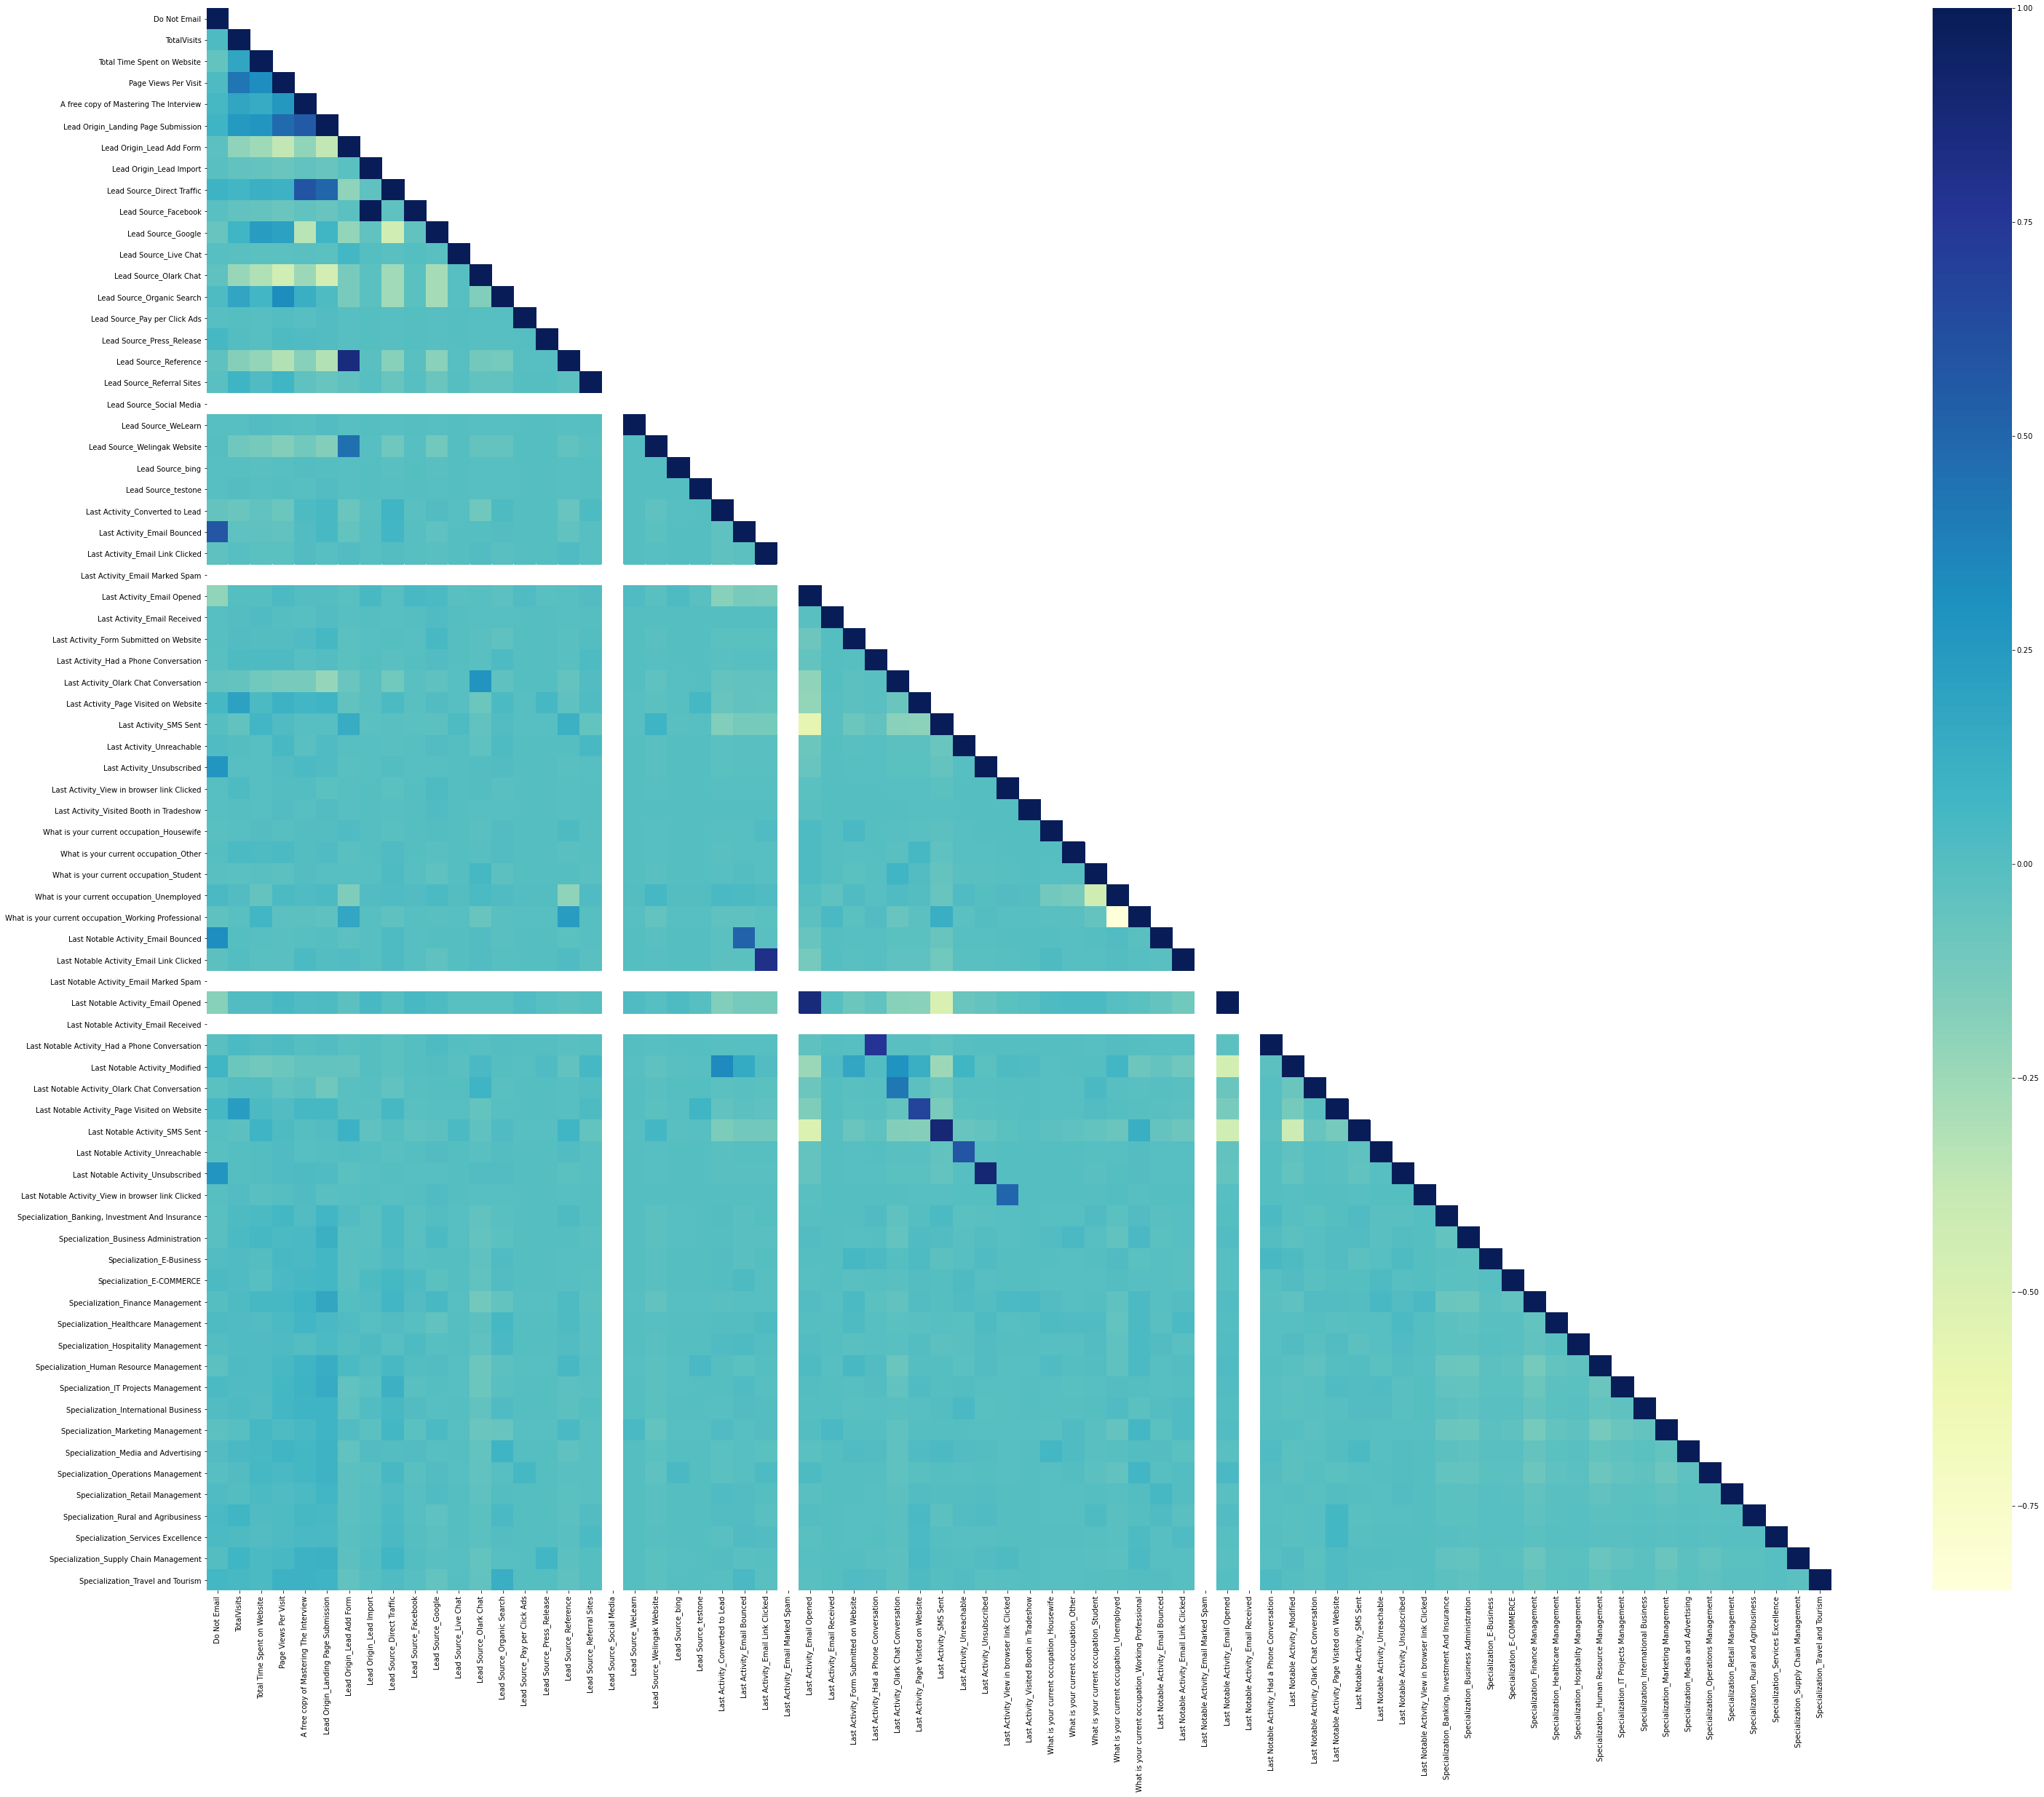

In [60]:
# Let's see the correlation matrix 

X_train_corr = X_train.corr()
plt.figure(figsize=(50,40))
mask = np.array(X_train_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(X_train_corr, mask = mask, cmap='YlGnBu')
plt.show()

In [61]:
# Let's check the matrix

X_train_corr

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,0.025073,-0.051399,0.025115,0.060307,0.089170,-0.032590,-0.016253,0.094985,-0.016253,-0.064034,-0.005737,-0.037097,0.030808,-0.004056,0.055274,-0.034002,-0.011968,NaN,-0.004056,-0.003047,-0.005737,-0.004056,-0.061257,0.580853,-0.037266,NaN,-0.208116,-0.004056,-0.006611,-0.016755,-0.040626,0.058699,-0.002582,0.024241,0.271134,-0.008116,-0.004056,-0.011482,0.003079,-0.014946,0.043921,-0.039446,0.318670,-0.032042,NaN,-0.181140,NaN,-0.012841,0.080918,-0.020778,0.057348,-0.004039,-0.016253,0.271487,-0.004056,-0.015194,-0.015690,0.016178,0.038611,0.001429,0.031830,0.009344,-0.029997,0.036497,0.011579,-0.028463,0.017008,-0.006981,0.018946,0.041347,0.037376,0.007973,0.067720
TotalVisits,0.025073,1.000000,0.180396,0.435633,0.183848,0.253439,-0.201371,-0.040149,0.069662,-0.040149,0.079346,-0.014172,-0.231200,0.182985,-0.001777,0.006467,-0.174069,0.083498,NaN,-0.004524,-0.091588,-0.004456,0.003719,-0.072914,-0.039064,-0.004490,NaN,-0.001532,0.003719,0.010640,0.030719,-0.060885,0.208788,-0.040369,0.010321,-0.006239,0.025309,0.000971,-0.007946,0.036727,-0.021210,0.016538,-0.013384,-0.001121,0.008020,NaN,0.012353,NaN,0.034390,-0.081202,0.004655,0.229616,-0.028839,0.001828,-0.003664,0.011963,0.029813,0.034644,0.019291,0.018314,0.029057,0.023107,0.020616,0.027975,0.018576,0.029421,-0.005065,0.041375,0.013192,0.004456,0.076798,0.026402,0.081599,0.053059
Total Time Spent on Website,-0.051399,0.180396,1.000000,0.317382,0.141123,0.271853,-0.254398,-0.056578,0.112708,-0.056578,0.232249,-0.019972,-0.314091,0.072174,-0.010807,-0.004629,-0.21

- There are couple of multi-collinearity can be seen from the above heatmap.
- We also see some blank or missing correlation in the heatmap, that explains that there is no correlation between the two variables. 

In [62]:
# columns pairs in order of highest absolute correlation
X_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)

Specialization_Travel and Tourism           Specialization_Travel and Tourism                       1.000000
Last Notable Activity_Unsubscribed          Last Activity_Unsubscribed                              0.893822
Last Activity_SMS Sent                      Last Notable Activity_SMS Sent                          0.889784
Last Notable Activity_Email Opened          Last Activity_Email Opened                              0.867378
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.862268
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.848961
Last Notable Activity_Email Link Clicked    Last Activity_Email Link Clicked                        0.806107
Last Activity_Had a Phone Conversation      Last Notable Activity_Had a Phone Conversation          0.766362
Last Activity_Page Visited on Website       Last Notable Activity_Page Visited on Website           0.684929
A free copy of Mast

- As we can see, the above pairs are highly correlated. We can refer to this while building our model to get rid of multicollinearity.

## 5. Model Building



- Now that we have done splitting and scaling, let's go ahead and build the model.
- First we will use RFE to select top 15 features 
- Then based on probability and VIF we will perform manual feature elimination to arrive at the desired model.

In [63]:
# Feature selection using RFE

logreg = LogisticRegression()

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [64]:
# Check the list of columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Emai

In [65]:
# Top 15 columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [66]:
# Consider RFE selected columns for model building

X_train = X_train[col]

#### Assessing the model with StatsModels

- Now that we have selected top 15 features using RFE, we can use manual feature elimination to get a better model that could solve our business problem at hand.

In [67]:
# Build model 1 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 07 Sep 2021   Deviance:                       4145.5
Time:                        17:33:42   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
Do Not Email                                            -1.5053      0.193     -7.781      0.000      -1.884      -1.126
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

- Here we can see except 'Last Notable Activity_Had a Phone Conversation', 'What is your current occupation_Housewife','Last Activity_Had a Phone Conversation' ,'What is your current occupation_Student' and 'Lead Source_Reference' all other columns have a probability < 0.05.
- Let's check for multicollinearity before deciding upon which column to drop.

In [68]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,84.19
5,Lead Source_Reference,65.18
6,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
2,Total Time Spent on Website,2.38
1,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


- VIF for 'Lead Origin_Lead Add Form', 'Lead Source_Reference' and 'Lead Source_Welingak Website' are very high.
- From the summary and VIF result, we see 'Lead Source_Reference' has very high P value as well as high VIF. 
- Also from our correlation matrix we have seen 'Lead Source_Reference' and 'Lead Origin_Lead Add Form' are highly correlated.
- So, we can drop 'Lead Source_Reference' column.

In [69]:
# Let's drop Lead Source_Reference since it has a high P value as well as high VIF

col = col.drop('Lead Source_Reference')

In [70]:
# Build model 2 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 07 Sep 2021   Deviance:                       4146.5
Time:                        17:33:42   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
Do Not Email                                            -1.5036      0.193     -7.779      0.000      -1.882      -1.125
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

- Except 'Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife', 'What is your current occupation_Student' and 'Last Activity_Had a Phone Conversation', all other columns have < 0.05 P value. Let's check VIF.

In [71]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
2,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,1.71
1,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33


- VIF looks good. 

- So we can consider 'Last Notable Activity_Had a Phone Conversation' column for dropping since it has high P-value and as per our correlation matrix, 'Last Notable Activity_Had a Phone Conversation' is highly correlated to 'Last Activity_Had a Phone Conversation'.

In [72]:
# Let's drop 'Last Notable Activity_Had a Phone Conversation' since it has high P-value

col = col.drop('Last Notable Activity_Had a Phone Conversation')

In [73]:
# Build model 3 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 07 Sep 2021   Deviance:                       4152.2
Time:                        17:33:43   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
Do Not Email                                            -1.5037      0.193     -7.780      0.000      -1.882      -1.125
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

- All P-values except for 'What is your current occupation_Housewife' and 'What is your current occupation_Student' are in desired range.

In [74]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
2,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,1.71
1,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33
0,Do Not Email,1.09
9,What is your current occupation_Student,1.09


- Since, VIF is good, we can drop 'What is your current occupation_Housewife' for its high P-value

In [75]:
# Let's drop 'What is your current occupation_Housewife' since it has a high P value

col = col.drop('What is your current occupation_Housewife')

In [76]:
# Build model 4 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 07 Sep 2021   Deviance:                       4156.7
Time:                        17:33:43   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
Do Not Email                                            -1.5063      0.193     -7.785      0.000      -1.886      -1.127
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

- P-value for 'What is your current occupation_Working Professional' is very high.

In [77]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
2,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,1.70
1,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33
0,Do Not Email,1.09
8,What is your current occupation_Student,1.09


- VIF looks good.
- Here we can consider to drop 'What is your current occupation_Unemployed' because it has slightly high VIF, and as per our correlation matrix it is highly correlated to 'What is your current occupation_Working Professional'. It also has a negative co-efficient where 'What is your current occupation_Working Professional' has a positive co-efficient. 
- So, if we drop 'What is your current occupation_Unemployed' and keep 'What is your current occupation_Working Professional' it would be easier to explain the contribution of this predictor towards lead conversion in a positive way to the business.
- Let's go ahead and drop 'What is your current occupation_Unemployed'

In [78]:
# Let's drop 'What is your current occupation_Unemployed' since it has a comparatively high VIF and negative co-efficient

col = col.drop('What is your current occupation_Unemployed')

In [79]:
# Build model 5 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.4
Date:                Tue, 07 Sep 2021   Deviance:                       4170.8
Time:                        17:33:43   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3292      0.094    -24.706      0.000      -2.514      -2.144
Do Not Email                                            -1.5033      0.193     -7.808      0.000      -1.881      -1.126
TotalVisits                                             11.6449      2.692      4.326      0.000       6.369      16.920
Total Time Spent on Website                              4.4271      0.185     23.960      0.000       4.065       4.789
Lead Origin_Lead Add Form                                4.2198      0.258     16.339      0.000       3.714       4.726
Lead Source_Olark Chat                                   1.4507      0.122     11.914      0.000       1.212       1.689
Lead Source_Welingak Website                             2.1356      1.037      2.060      0.039       0.104       4.167
Last Activity_Had a Phone Conversation                   2.7284      0.802      3.403      0.001       1.157       4.300
Last Activity_SMS Sent                                   1.1645      0.082     14.184      0.000       1.004       1.325
What is your current occupation_Student                  0.1721      0.218      0.789      0.430      -0.256       0.600
What is your current occupation_Working Professional     2.5985      0.197     13.189      0.000       2.212       2.985
Last Notable Activity_Unreachable                        2.7797      0.805      3.454      0.001       1.202       4.357
========================================================================================================================
"""

- 'What is your current occupation_Student' has a high P-value. 
- Rest all look good.

In [80]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.58
3,Lead Origin_Lead Add Form,1.50
7,Last Activity_SMS Sent,1.47
1,TotalVisits,1.35
5,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.21
4,Lead Source_Olark Chat,1.06
0,Do Not Email,1.04
8,What is your current occupation_Student,1.03
6,Last Activity_Had a Phone Conversation,1.01


- Let us drop 'What is your current occupation_Student' since it has very high P value.

In [81]:
# Let's drop 'What is your current occupation_Student' since it has a high P value

col = col.drop('What is your current occupation_Student')

In [82]:
# Build model 6 using statsmodel and check the summary

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.7
Date:                Tue, 07 Sep 2021   Deviance:                       4171.4
Time:                        17:33:44   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3225      0.094    -24.756      0.000      -2.506      -2.139
Do Not Email                                            -1.5055      0.193     -7.818      0.000      -1.883      -1.128
TotalVisits                                             11.6125      2.689      4.318      0.000       6.342      16.883
Total Time Spent on Website                              4.4275      0.185     23.963      0.000       4.065       4.790
Lead Origin_Lead Add Form                                4.2219      0.258     16.349      0.000       3.716       4.728
Lead Source_Olark Chat                                   1.4546      0.122     11.954      0.000       1.216       1.693
Lead Source_Welingak Website                             2.1297      1.037      2.054      0.040       0.098       4.162
Last Activity_Had a Phone Conversation                   2.7225      0.802      3.396      0.001       1.151       4.294
Last Activity_SMS Sent                                   1.1604      0.082     14.170      0.000       1.000       1.321
What is your current occupation_Working Professional     2.5929      0.197     13.170      0.000       2.207       2.979
Last Notable Activity_Unreachable                        2.7731      0.805      3.446      0.001       1.196       4.351
========================================================================================================================
"""

- All P-values below 0.05.

In [83]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.57
3,Lead Origin_Lead Add Form,1.49
7,Last Activity_SMS Sent,1.47
1,TotalVisits,1.35
5,Lead Source_Welingak Website,1.32
8,What is your current occupation_Working Profes...,1.20
0,Do Not Email,1.04
4,Lead Source_Olark Chat,1.04
6,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.00


- All VIFs below 2.

- Now both P value and VIF look good. We can go ahead with Model evaluation.

## 6. Model Evaluation

- Now that we are done with model building, let's go ahead with model evaluation.
- Here we will check the accuracy, sensitivity and specificity to evaluate our model.

In [84]:
# Predict y_train using the final model

y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

8003    0.300180
218     0.145170
4171    0.130917
4037    0.295699
3660    0.955206
dtype: float64

In [85]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.30018016, 0.14517038, 0.13091673, 0.29569865, 0.95520582])

In [86]:
# Create a df containing the actual and predicted values

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conv_Prob
0,0,0.300180
1,0,0.145170
2,1,0.130917
3,1,0.295699
4,1,0.955206


In [87]:
# Create a new column 'Predicted', store 1 if Conv_Prob > 0.5 and 0 if Conv_Prob <= 0.5

y_train_pred_final['Predicted'] = y_train_pred_final['Conv_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Predicted
0,0,0.300180,0
1,0,0.145170,0
2,1,0.130917,0
3,1,0.295699,0
4,1,0.955206,1


In [88]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1925  387]
 [ 566 1583]]


In [89]:
#  Predicted     not_converted    converted
#  Actual
#  not_converted        3478      443
#  converted            760        1691  

In [90]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7863707688859001


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7366216845044207

In [93]:
# Let us calculate specificity

TN / float(TN+FP)

0.8326124567474048

In [94]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

- With a cut-off at 0.5, we get accuracy = 78%, sensitivity = 73% and specificity = 83%

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [95]:
# Function for ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
# Define fpr, tpr, thresholds

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

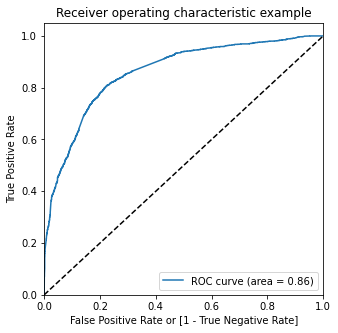

In [97]:
# Plot ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

- Here we get area under our ROC curve 0.86, which is good.
- Let's find the optimal cut-off probability.

#### Optimal Cut-off

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Prediction at various probabilities

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300180,0,1,1,1,1,0,0,0,0,0,0
1,0,0.145170,0,1,1,0,0,0,0,0,0,0,0
2,1,0.130917,0,1,1,0,0,0,0,0,0,0,0
3,1,0.295699,0,1,1,1,0,0,0,0,0,0,0
4,1,0.955206,1,1,1,1,1,1,1,1,1,1,1


In [99]:
# Create a data frame to store cut-off probability and respective Accuracy, Sensitivity, Specificity

df = pd.DataFrame (columns = ['Probability', 'Accuracy', 'Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    df.loc[i] =[ i,accuracy,sensitivity,specificity]
    
print(df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.524546     0.996277     0.086073
0.2          0.2  0.697601     0.944160     0.468426
0.3          0.3  0.771128     0.863658     0.685121
0.4          0.4  0.790854     0.807352     0.775519
0.5          0.5  0.786371     0.736622     0.832612
0.6          0.6  0.757005     0.623546     0.881055
0.7          0.7  0.734140     0.540717     0.913927
0.8          0.8  0.709706     0.448581     0.952422
0.9          0.9  0.643578     0.278269     0.983131


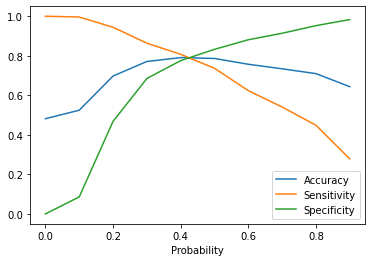

In [100]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

- As we can see at around 0.42, our sensitivity and specificity values are same.

In [101]:
# Find prediction using 0.42 as cut-off

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.300180,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.145170,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.130917,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.295699,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.955206,1,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7901815736381977

In [103]:
# Plot confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[1823,  489],
       [ 447, 1702]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7919962773382969

In [106]:
# Let us calculate specificity

TN / float(TN+FP)

0.7884948096885813

- Now with cutoff 0.42, we get a very good accuracy 79%, and our sensitivity(79.2%) and specificity (78.8%) are also sort of similar.
- We are good with this model at 0.42 probability cut-off and now we can predict on test data.

## 7. Predict on Test

In [107]:
# Scale Test data

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [108]:
# Consider the columns from our final model

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
4771,0,0.000000,0.000000,1,0,0,0,1,1,0
6122,0,0.027888,0.029049,0,0,0,0,0,0,0
9202,0,0.015936,0.416813,0,0,0,0,1,0,0
6570,1,0.011952,0.378961,0,0,0,0,1,0,0
2668,0,0.031873,0.395246,0,0,0,0,1,0,0


In [109]:
# Add constant

X_test_sm = sm.add_constant(X_test)

In [110]:
# predict on y_test

y_test_pred = res.predict(X_test_sm)

In [111]:
# Check first 5 values
y_test_pred[:5]

4771    0.996504
6122    0.133542
9202    0.704424
6570    0.299243
2668    0.722726
dtype: float64

In [112]:
# Converting to a dataframe

y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
4771,0.996504
6122,0.133542
9202,0.704424
6570,0.299243
2668,0.722726


In [113]:
# Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [114]:
# Remove index for both dataframes to append them side by side

y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Append the 2 data frames

y_pred_final = pd.concat([y_test_df, y_test_pred_df], axis = 1)

# Rename the column

y_pred_final = y_pred_final.rename(columns = {0:'Conv_Prob'})

y_pred_final.head()

,Converted,Conv_Prob
0,1,0.996504
1,0,0.133542
2,0,0.704424
3,1,0.299243
4,1,0.722726


In [116]:
# Store final predicted value in a new column

y_pred_final['Final_Predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [117]:
# Create a new column to store Lead Score

y_pred_final['Lead Score'] = round(y_pred_final['Conv_Prob']*100)

y_pred_final.head(10)

,Converted,Conv_Prob,Final_Predicted,Lead Score
0,1,0.996504,1,100.0
1,0,0.133542,0,13.0
2,0,0.704424,1,70.0
3,1,0.299243,0,30.0
4,1,0.722726,1,72.0
5,1,0.798983,1,80.0
6,0,0.709292,1,71.0
7,1,0.473663,1,47.0
8,0,0.282291,0,28.0
9,1,0.787240,1,79.0


In [118]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7819037656903766

In [119]:
# Plot the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[781, 215],
       [202, 714]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7794759825327511

In [122]:
# Let us calculate specificity

TN / float(TN+FP)

0.7841365461847389

- As per our model evalauation on Test data, we are getting an accuracy, sensitivity and specificity close to 78%. Since all these values are close enough, we can say that this is a decent model and can be used to predict lead conversion.

## 8. Conclusion

- In this case study, we were able to build a model with 79% accuracy.

- As per the top features of the model, the sales team must focus on leads who have very high number of visits to X Education website and those who are spending more time on the website.

- Also the team should pay more attention to the customer who are identified as leads through Lead Add Form origin identifier.

- Last but not the least, the team should target the working professionals and leads who have recently had a phone conversation  with the team.
